Introdução ao Pandas:

Nesta aula iremos realizar algumas operaçoes sobre um conjunto de dados através de um conjunto de metodos que o Pandas nos disponibiliza, para que consigamos extrair algumas informaçoes e, até mesmo, gerar gráficos delas.

Abrindo um Arquivo e criando um dataframe através do Pandas:

Para começar, precisamos importar a biblioteca do Pandas para utilizarmos em nosso código. A biblioteca Numpy, irá nos fornecer algumas outras funções para tratamento dos dados e gerar gráficos com o Matplotlib mais adiante.

In [190]:
#importando o pandas, numpy e Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Após importar as bibliotecas, vamos começar a tratar os dados.

Nossa primeira operação será criar um dataframe através do pandas e abrir nosso arquivo, colocando-o neste dataframe criado.

In [191]:
#nesta linha de codigo iremos abrir o arquivo e colocá-lo em um dataframe
#O nome do dataframe é opcional, neste caso usaremos "dataframe" para ser
#mais intuitivo
dataframe = pd.read_csv("houses_to_rent_v2.csv")
#agora iremos imprimir este dataframe na tela.
dataframe

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


Como podemos ver, nosso dataframe possui 10692 linhas e 13 colunas, sendo as colunas relacionadas à cidade do imovel, sua area, numero de quartos, entre outras coisas.


Com o metodo head() podemos pegar as 5 primeiras linhas do nosso dataframe, enquanto o metodo tail() irá pegar as ultimas 5, por padrão. Tal valor pode ser alterado, com o parametro n do metodo, ou seja, caso utilizemos tail(n=7), iremos pegar os ultimos 7 elementos do dataframe.

In [192]:
dataframe.head(n=7)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750


In [193]:
#Com o comando abaixo, filtramos as colunas que queremos analisar no dataframe
#Dessa forma, podemos, à partir do dataframe original, criar um novo de forma filtrada
dataframe[["city","area","rooms","bathroom","rent amount (R$)"]]
dataframe_filtrado = dataframe[["city","area","rooms","bathroom","rent amount (R$)"]]

In [194]:
print(dataframe.head())
print("---------------------------------------------------------------------")
print(dataframe_filtrado.head())

           city  area  rooms  bathroom  parking spaces floor     animal  \
0     São Paulo    70      2         1               1     7      acept   
1     São Paulo   320      4         4               0    20      acept   
2  Porto Alegre    80      1         1               1     6      acept   
3  Porto Alegre    51      2         1               0     2      acept   
4     São Paulo    25      1         1               0     1  not acept   

       furniture  hoa (R$)  rent amount (R$)  property tax (R$)  \
0      furnished      2065              3300                211   
1  not furnished      1200              4960               1750   
2  not furnished      1000              2800                  0   
3  not furnished       270              1112                 22   
4  not furnished         0               800                 25   

   fire insurance (R$)  total (R$)  
0                   42        5618  
1                   63        7973  
2                   41        3841 

Com o comando dtypes, podemos ver os tipos de dados de toda a tabela

In [195]:
dataframe.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

Existem alguns outros métodos, como o unique() e o mean(), através deles podemos calcular a media de certa coluna ou ver quantos dados distintos existem.

In [196]:
#Aqui vemos que, dentre todos os imoveis,
#existem 9 possiveis quantidades de quartos
dataframe["rooms"].unique()

array([ 2,  4,  1,  3,  7,  5,  8,  6, 10, 13,  9], dtype=int64)

In [197]:
#Já aqui, vemos que a area media de todos os imoveis é de 151.14 m²
dataframe["area"].mean()

149.21791994014217

Além disso, podemos agrupar os dados a partir de uma coluna e calcular suas medias com o metodo groupby() seguido do mean()

Podemos também ordená-los de acordo com alguma condição, através do metodo sort_values()

In [198]:
#Aqui vemos os dados agrupados através da quantidade de quartos
#Mostrando suas respectivas médias através das colunas
dataframe.groupby("rooms").mean()

,area,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
rooms,,,,,,,,
1,45.112062,1.086797,0.489405,1449.411573,2027.854931,203.370416,26.719641,3707.640994
2,82.173109,1.562353,0.989916,624.528403,2462.187227,134.546218,32.880672,3254.217815
3,166.724992,2.595289,1.948914,1097.208626,4482.279596,369.907617,60.977057,6010.659223
4,314.054224,3.893443,3.184111,1875.482346,7155.170240,888.208701,98.583859,10017.626103
5,501.274306,4.631944,4.041667,1880.079861,8227.239583,1024.631944,122.767361,11255.065972
6,425.573529,4.808824,3.926471,483.205882,7466.397059,928.926471,117.382353,8996.088235
7,464.277778,5.388889,3.861111,45.861111,8865.277778,917.305556,137.777778,9966.638889
8,468.545455,5.363636,3.454545,40.909091,9872.727273,786.636364,156.818182,10857.272727
9,400.000000,4.000000,4.000000,100.000000,12000.000000,500.000000,181.000000,12780.000000


In [199]:
#Aqui ordenamos o dataframe inteiro pelo valor total
dataframe.sort_values(by="total (R$)")

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10627,Belo Horizonte,22,1,1,0,-,acept,not furnished,30,450,13,6,499
5876,Rio de Janeiro,30,1,1,1,3,acept,not furnished,0,500,0,7,507
9317,Rio de Janeiro,30,1,1,1,3,acept,not furnished,0,500,0,7,507
5152,São Paulo,35,1,1,0,-,not acept,not furnished,0,500,0,8,508
8183,Porto Alegre,30,1,1,0,-,not acept,not furnished,0,500,0,9,509
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,São Paulo,285,4,5,4,6,acept,furnished,200000,20000,1834,254,222100
6230,São Paulo,340,5,4,2,7,acept,not furnished,220000,12000,1000,153,233200
6645,São Paulo,42,1,2,1,6,not acept,not furnished,690,2500,313700,32,316900
255,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000


In [200]:
#Aqui agrupamos os dados pela quantidade de quartos, fazendo a media das colunas
#E ordenamos de forma crescente os dados através da média das areas
dataframe.groupby("rooms").mean()["area"].sort_values()

rooms
1      45.112062
2      82.173109
3     166.724992
4     314.054224
10    380.333333
9     400.000000
6     425.573529
13    439.000000
7     464.277778
8     468.545455
5     501.274306
Name: area, dtype: float64

Com value_counts() podemos contar a quantidade de ocorrencias dos dados em determinada coluna

In [201]:
#Aqui temos a quantidade de imoveis por cidade.
dataframe["city"].value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

Além disso o Pandas nos permite realizar a Indexação Booleana, sendo assim, podemos passar no paramentro de colunas do dataframe uma expressão boleana para filtrarmos os dados que queremos. Vejamos o exemplo a seguir:

In [202]:
#Filtramos imoveis que possuem dois quartos e valor total menor ou igual a R$700
#que se situem em Porto Alegre
dataframe[(dataframe["rooms"]==2) & (dataframe["total (R$)"]<=700)
          & (dataframe["city"]=="Porto Alegre")]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
325,Porto Alegre,28,2,1,1,-,acept,not furnished,0,600,0,11,611
1219,Porto Alegre,60,2,1,1,-,acept,not furnished,0,540,0,10,550
4950,Porto Alegre,60,2,1,1,-,acept,not furnished,0,540,0,10,550


Pandas também dá suporte para que você aplique as suas funções aos dados, através do método apply(). Neste caso, o parametro do metodo apply() será o nome da função que você deseja aplicar. Exemplo:

In [203]:
#Aqui criamos uma função que abrevia Porto Alegre para POA e São Paulo p/ SP
#Ao aplicar o metodo apply(), fazemos com que todos dados de determinada coluna
#sejam submetidos à função, permitindo que sejam feitas alterações no dataframe
#Caso se deseje salvar as alterações, atribua a linha de codigo abaixo à mesma
# variavel. Ex: dataframe["city"] = dataframe["city"].apply(abreviar_cidade)
def abreviar_cidade(cidade):
    if cidade == 'Porto Alegre':
        cidade = "POA"
    elif cidade == "São Paulo":
        cidade = "SP"
    return cidade

dataframe["city"].apply(abreviar_cidade)

0                    SP
1                    SP
2                   POA
3                   POA
4                    SP
              ...      
10687               POA
10688                SP
10689    Rio de Janeiro
10690    Rio de Janeiro
10691                SP
Name: city, Length: 10692, dtype: object

Tratando dados com o Numpy:

O numpy nos permite tratar algumas peculiaridades nos datasets, como por exemplo, quando alguns dados possuem o valor NaN.

Dessa forma, o numpy nos fornece alguns metodos para:
    -retirar linhas que possuen algum dado NaN, através do metodo dropna()
    -substituir todos os valores que possuem NaN por outro, com fillna()
    -atribuir um NaN à um dado, com o np.nan

In [204]:
#Aqui substituimos todos os valores 0 na coluna parking spaces por NaN
dataframe = dataframe.replace({"parking spaces": {0: np.nan}})
#Aqui verificamos quais dados são NaN, retornando valores booleanos
dataframe.isna()
#Aqui preenchemos todos os valores NaN com 0
dataframe = dataframe.fillna(0)

Gerando gráficos com o numpy, Pandas e Matplotlib:

O Pandas possui diversas opções de geração de gráficos, como histogramas, de pizza, colunas, entre outros. À partir do método plot() que os dataframes possuem, podemos combinar os dois para gerarmos alguns gráficos, como veremos à seguir.

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64


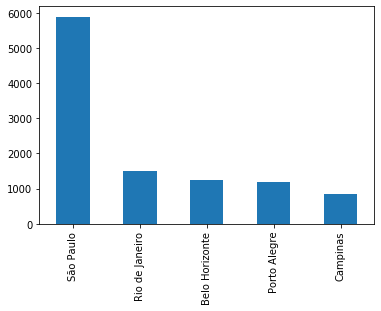

In [205]:
#Quantidade de imoveis por cidade
dataframe["city"].value_counts().plot.bar()
print(dataframe["city"].value_counts())

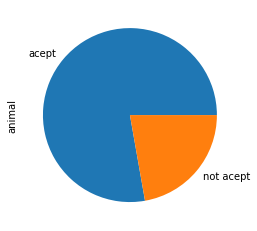

In [206]:
#Grafico de pizza comparando imoveis que aceitam animais e os que nao aceitam
dataframe["animal"].value_counts().plot.pie()

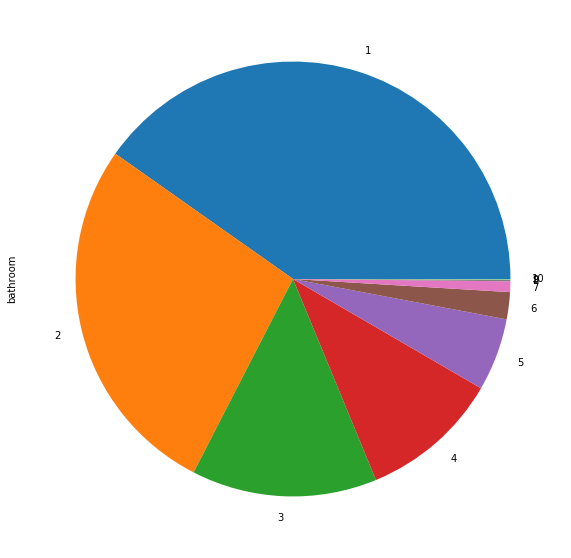

In [207]:
#Grafico comparando a quantidade de imoveis com X numero de banheiros
dataframe["bathroom"].value_counts().plot.pie(figsize=(10,10))

Por fim, caso deseje salvar seu dataframe de volta para algum arquivo CSV, é possível e bem simples, basta usar o metodo to_csv(), passando como parametro o nome que deseja que o arquivo tenha e sua extensão. Exemplo:

In [208]:
#Fazendo isto, salvamos o dataframe que criamos em um arquivo nomeado
#"nome_do_arquivo" que é do tipo CSV
dataframe.to_csv("nome_do_arquivo.csv")